In [1]:
library(karyoploteR)
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks BiocGenerics::combine()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()
✖ lubridate::second()   masks S4Vectors::second()
✖ lubridate::second<-

### load the cnv

In [2]:
high <- read.table('high')

In [3]:
low <- read.table('low')

In [4]:
neg <- read.table('neg')

In [5]:
colnames(high) <-c("chr","start","end","cn","type","sample")

In [6]:
colnames(low) <-c("chr","start","end","cn","type","sample")

In [7]:
colnames(neg) <-c("chr","start","end","cn","type","sample")

In [8]:
plot_params <- list(leftmargin = 0.1, rightmargin = 0.05, 
            topmargin = 120, bottommargin = 100, ideogramheight = 50, 
            ideogramlateralmargin = 0, data1height = 400, data1inmargin = 10, 
            data1outmargin = 20, data1min = 0, data1max = 1, 
            data2height = 0, data2inmargin = 0, data2outmargin = 0, 
            data2min = 0, data2max = 1)

In [9]:
unique_high <- unique(high$sample)
unique_low <- unique(low$sample)
unique_neg <- unique(neg$sample)

In [21]:
(87857749+88258796)/2

[1] 88058272

In [37]:
pdf(file = "Chr15.neg.amp.pdf",width = 6,height = 5)
kp <- plotKaryotype(chromosomes = "chr15",zoom =toGRanges(data.frame("chr15", 87e6, 90e6)) ,
                    genome = "hg38",plot.params=plot_params)
kpAddBaseNumbers(kp,tick.dist = 500000)

markers <- data.frame(chr=rep("chr15",1), pos=c(88058272), labels=c("NTRK3"))
kpPlotMarkers(kp, chr=markers$chr, x=markers$pos, labels=markers$labels,y = 0.8)

kpPlotRegions(kp, data=toGRanges(c("chr15:87857749-88258796")), r0=0, r1=0.03, col = "blue", border=NA, lwd=3)

temp_r1 = 0.03
for(i in unique_neg){
    neg %>% filter(sample==i) ->temp
    regs <- GenomicRanges::reduce(toGRanges(temp))
    kpPlotRegions(kp, data=regs, r0=temp_r1+0.015, r1=temp_r1+0.045, col = "red", border=NA, lwd=0)
    temp_r1  = temp_r1+ 0.045

}
dev.off()

png 
  2

In [35]:
pdf(file = "Chr15.high.amp.pdf",width = 6,height = 5)
kp <- plotKaryotype(chromosomes = "chr15",zoom =toGRanges(data.frame("chr15", 87e6, 90e6)) ,
                    genome = "hg38",plot.params=plot_params)
kpAddBaseNumbers(kp,tick.dist = 500000)

markers <- data.frame(chr=rep("chr15",1), pos=c(88058272), labels=c("NTRK3"))
kpPlotMarkers(kp, chr=markers$chr, x=markers$pos, labels=markers$labels,y = 0.8)

kpPlotRegions(kp, data=toGRanges(c("chr15:87857749-88258796")), r0=0, r1=0.03, col = "blue", border=NA, lwd=3)

temp_r1 = 0.03
for(i in unique_high){
    high %>% filter(sample==i) ->temp
    regs <- GenomicRanges::reduce(toGRanges(temp))
    kpPlotRegions(kp, data=regs, r0=temp_r1+0.015, r1=temp_r1+0.045, col = "red", border=NA, lwd=0)
    temp_r1  = temp_r1+ 0.045

}
dev.off()

png 
  2

In [36]:
pdf(file = "Chr15.low.amp.pdf",width = 6,height = 5)
kp <- plotKaryotype(chromosomes = "chr15",zoom =toGRanges(data.frame("chr15", 87e6, 90e6)) ,
                    genome = "hg38",plot.params=plot_params)
kpAddBaseNumbers(kp,tick.dist = 500000)

markers <- data.frame(chr=rep("chr15",1), pos=c(88058272), labels=c("NTRK3"))
kpPlotMarkers(kp, chr=markers$chr, x=markers$pos, labels=markers$labels,y = 0.8)

kpPlotRegions(kp, data=toGRanges(c("chr15:87857749-88258796")), r0=0, r1=0.03, col = "blue", border=NA, lwd=3)

temp_r1 = 0.03
for(i in unique_low){
    low %>% filter(sample==i) ->temp
    regs <- GenomicRanges::reduce(toGRanges(temp))
    kpPlotRegions(kp, data=regs, r0=temp_r1+0.015, r1=temp_r1+0.045, col = "red", border=NA, lwd=0)
    temp_r1  = temp_r1+ 0.045

}
dev.off()

png 
  2

In [33]:
high$sample %>% unique() %>% length()

[1] 8

In [34]:
low$sample %>% unique() %>% length()

[1] 5

In [35]:
neg$sample %>% unique() %>% length()

[1] 2

In [26]:
aa <- data.frame(amp=c(12,8,4,0),un=c(113-12,42-8,45-4,26-0))

In [27]:
rownames(aa) <- c("All","High","Low","Neg")
aa$name = rownames(aa)
aa %>% mutate(amp_per = amp/(amp+un),un_per=un/(amp+un)) -> aa2

In [28]:
aa2

,amp,un,name,amp_per,un_per
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
All,12,101,All,0.10619469,0.8938053
High,8,34,High,0.19047619,0.8095238
Low,4,41,Low,0.08888889,0.9111111
Neg,0,26,Neg,0.00000000,1.0000000


In [29]:
aa2[,3:5] %>% pivot_longer(!name, names_to = "type", values_to = "percentage") -> aa3

In [30]:
aa3$type = factor(aa3$type,levels=c("un_per","amp_per"))

In [31]:
openxlsx::write.xlsx(x=aa2,rowNames = FALSE,file = "Chr15.bar.xlsx")

In [32]:
p <- ggplot(data=aa3, aes(x=name, y=percentage, fill=type)) + geom_bar(stat="identity")+
    scale_fill_manual(values=c("#61B7CF","#025167"))+theme_bw() + theme(axis.text = element_text(color="black",size=15))+
    xlab("")+geom_text(aes(label = scales::percent(percentage)),color="white",position=position_fill(vjust =0.5),size = 4)

In [33]:
ggsave(filename = "Chr15.bar.pdf",plot = p,width = 5,height = 4)

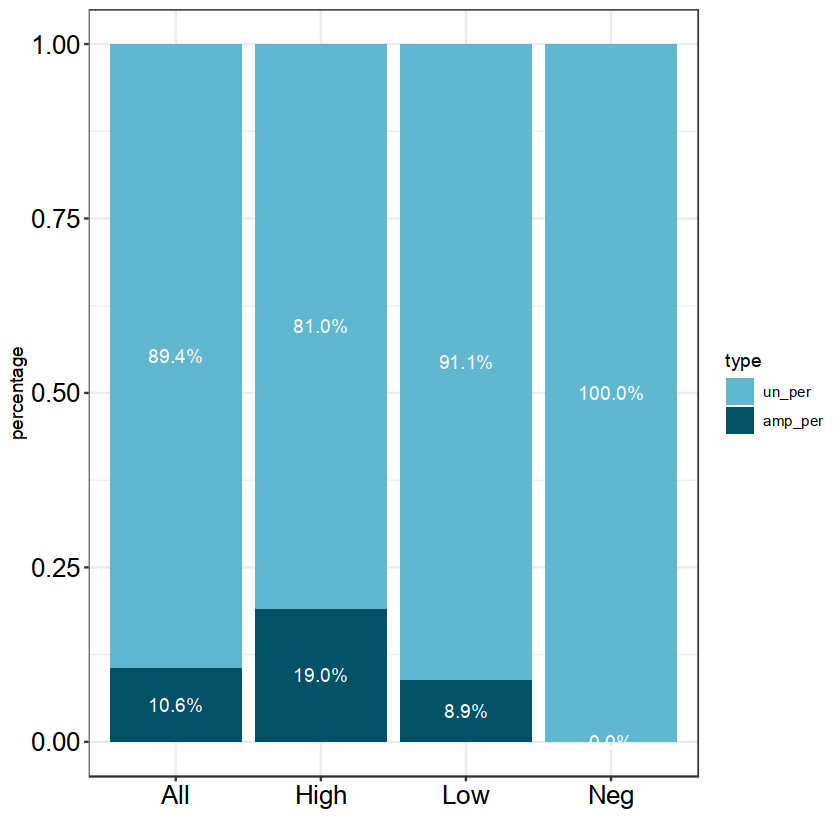

In [34]:
p